
Inspeção do arquivo image.txt:
Linha 1: CHANNEL 0
Linha 2: FRAME
Linha 3: 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 2

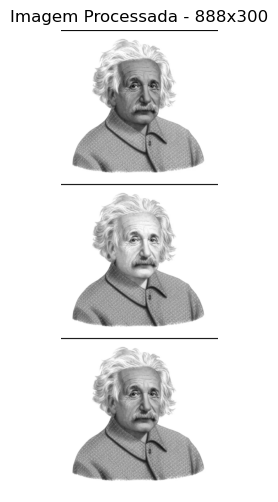

In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

def load_irregular_txt(file_path):
    """
    Carrega arquivos texto com formato irregular (número variável de colunas)
    Retorna um array numpy com preenchimento de zeros onde necessário
    """
    with open(file_path, 'r') as f:
        lines = f.readlines()
    
    # Encontra o número máximo de colunas
    max_cols = max(len(line.replace(',', ' ').split()) for line in lines)
    
    data = []
    for line in lines:
        # Processa cada linha, convertendo para números quando possível
        row = []
        for item in line.replace(',', ' ').split():
            try:
                row.append(float(item))
            except ValueError:
                continue  # Ignora strings não numéricas
        
        # Preenche com zeros se a linha for menor que max_cols
        if len(row) < max_cols:
            row += [0] * (max_cols - len(row))
        data.append(row[:max_cols])  # Garante que não exceda max_cols
    
    return np.array(data)

def read_and_save_image(input_file='image.txt', output_file='output.png'):
    try:
        print(f"Processando arquivo: {input_file}")
        print(f"Tamanho do arquivo: {os.path.getsize(input_file)} bytes")
        
        # Carrega os dados tratando formato irregular
        image_data = load_irregular_txt(input_file)
        
        print(f"\nDados carregados:")
        print(f"- Formato do array: {image_data.shape}")
        print(f"- Valores mín/méd/máx: {image_data.min():.1f}/{image_data.mean():.1f}/{image_data.max():.1f}")
        
        # Normalização para 0-255
        if image_data.max() > 1.0:
            image_data = image_data.astype(np.uint8)
        else:
            image_data = (image_data * 255).astype(np.uint8)
        
        # Cria a imagem (trata tanto 2D quanto 3D)
        if len(image_data.shape) == 2:
            # Converte imagem 2D para RGB
            img = Image.fromarray(image_data).convert('RGB')
        else:
            img = Image.fromarray(image_data)
        
        img.save(output_file)
        
        plt.figure(figsize=(10, 6))
        plt.imshow(img)
        plt.title(f"Imagem Processada - {image_data.shape[0]}x{image_data.shape[1]}")
        plt.axis('off')
        plt.show()
        
        return image_data
        
    except Exception as e:
        print(f"\nERRO: {str(e)}")
        print("\nSoluções possíveis:")
        print("1. Verifique se o arquivo contém dados numéricos consistentes")
        print("2. Inspecione o arquivo com:")
        print("   with open('image.txt', 'r') as f: print(f.read(500))")
        print("3. Se houver cabeçalhos complexos, especifique skiprows=N")
        return None

# Função para inspecionar o arquivo
def inspect_file(file_path, num_lines=10):
    print(f"\nInspeção do arquivo {file_path}:")
    with open(file_path, 'r') as f:
        for i, line in enumerate(f):
            if i >= num_lines:
                break
            print(f"Linha {i+1}: {line.strip()}")

# Primeiro: inspecione o arquivo
inspect_file('image.txt')

# Segundo: processe a imagem
image_data = read_and_save_image()

if image_data is not None:
    # Operações adicionais (grayscale, substituição de pixels, etc.)
    pass